In [258]:
from scipy.stats import expon, gamma, chi, lognorm, cauchy, beta, cosine, moment
from numpy import mean, var
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [221]:
# set configurations for number of samples and moments
nr_sample = 20
nr_moments = 5

In [264]:
# make the sample regeneratable
random.seed(10)

# Samples from different distributions
# exponential
ex_lambda = 2
r_expon = expon.rvs(size=(nr_sample,1000), scale = 1/ex_lambda)

# gamma
alpha = 4
r_gamma = gamma.rvs(alpha, size=(nr_sample,1000))

# chi
d_f = 25
r_chi = chi.rvs(d_f, size=(nr_sample,1000))

# lognormal
s = 1
r_lognorm = lognorm.rvs(s, size=(nr_sample,1000))

# cauchy
r_cauchy = cauchy.rvs(size=(nr_sample,1000))

# beta
a, b = 0.5, 0.5
r_beta = beta.rvs(a, b, size=(nr_sample,1000))

# cosine
r_cosine = cosine.rvs(size=(nr_sample,1000))

In [265]:
rvs = [r_expon, r_chi, r_gamma, r_lognorm, r_cauchy, r_cosine]
dists_names = ['exponential', 'chi', 'gamma', 'lognormal', 'cauchy', 'cosine']

df_final = pd.DataFrame()

# parameter moment is the central mean, so I used mean() for n=1
for i in range(len(rvs)):
    m = np.zeros((nr_moments,nr_sample))
    m[0,]  = mean(rvs[i], axis = 1)
    for n in range(2,nr_moments+1):
        m[n-1,] = moment(rvs[i], n, axis=1)
        
    df_temp = pd.DataFrame(np.transpose(m))
    df_temp['dist'] = dists_names[i]

    df_final=pd.concat([df_final, df_temp], ignore_index=True)

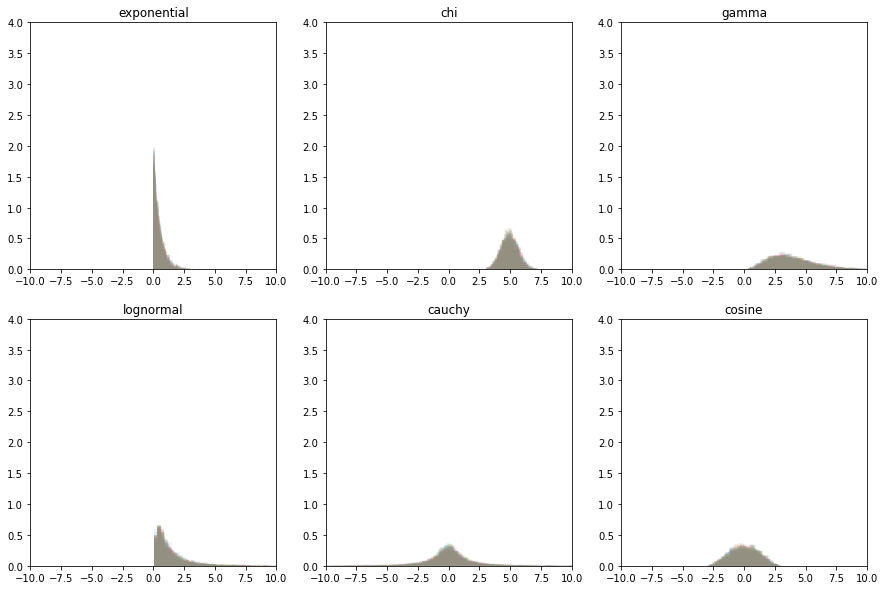

In [266]:
nrow = 2
ncol = 3
fig, ax = plt.subplots(nrow, ncol, figsize =(15,10))

for row in range(nrow):
    for col in range(ncol):
        for i in range(nr_sample):
            ax[row,col].hist(rvs[row*3+col][i,:], density=True, bins='auto', histtype='stepfilled', alpha=0.1)
            ax[row,col].set_title(dists_names[row*3+col])
            ax[row,col].set_xlim(-10,10)
            ax[row,col].set_ylim(0,4)

In [267]:
df_final.to_csv('moments.csv', index=False) 

In [225]:
df_final

,0,1,2,3,4,dist
0,0.520837,0.291978,0.362298,0.980526,2.972975,exponential
1,0.512086,0.277466,0.298349,0.664111,1.538261,exponential
2,0.525898,0.268706,0.258176,0.545786,1.150827,exponential
3,0.501127,0.241157,0.216538,0.417243,0.789776,exponential
4,0.499742,0.245668,0.246066,0.550766,1.334128,exponential
...,...,...,...,...,...,...
115,0.669359,0.089292,-0.018452,0.017881,-0.007572,beta
116,0.668657,0.089126,-0.017115,0.017131,-0.007026,beta
117,0.671485,0.088312,-0.018033,0.017386,-0.007387,beta
118,0.657742,0.091888,-0.016837,0.017601,-0.006887,beta
